In [1]:
import shap
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Read the dataset
df = pd.read_csv("Crop_recommendation.csv")

# Encode the labels
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

# Split the dataset
X = df.drop(columns="label", axis=1) # Independent variables
y = df['label'] # Dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)




In [2]:
print(X_train.shape)
print(X_test.shape)

(1540, 7)
(660, 7)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        25
           5       1.00      1.00      1.00        28
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        44
           8       1.00      0.94      0.97        34
           9       1.00      1.00      1.00        33
          10       1.00      1.00      1.00        27
          11       1.00      1.00      1.00        28
          12       1.00      1.00      1.00        32
          13       1.00      1.00      1.00        33
          14       1.00      1.00      1.00        33
          15       1.00      1.00      1.00        36
          16       1.00      1.00      1.00        23
          17       1.00    

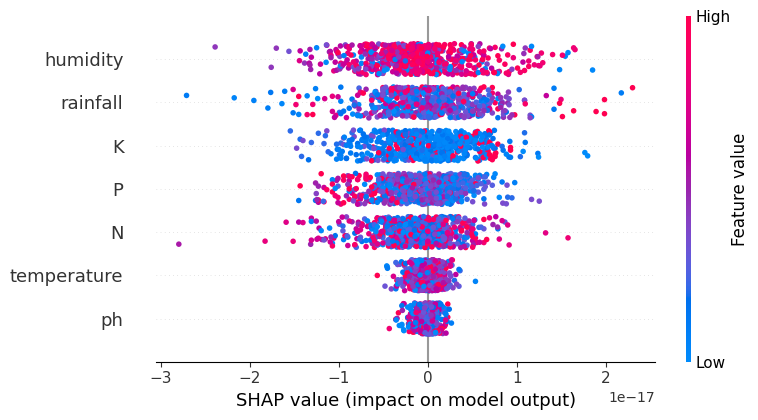

In [10]:
# Train a machine learning model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
scores1=clf.score(X_test,y_test)
# Make predictions
y_pred = clf.predict(X_test)

# Print classification report
print(classification_report(y_pred, y_test))

# SHAP values
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)

shap_values_summary = np.mean(shap_values, axis=2)


# Plot SHAP summary plot
shap.summary_plot(shap_values_summary, X_test)


Descision Plot:
Each plotted line on the decision plot shows how strongly the individual features contributed to a single model prediction, thus explaining what feature values pushed the prediction.

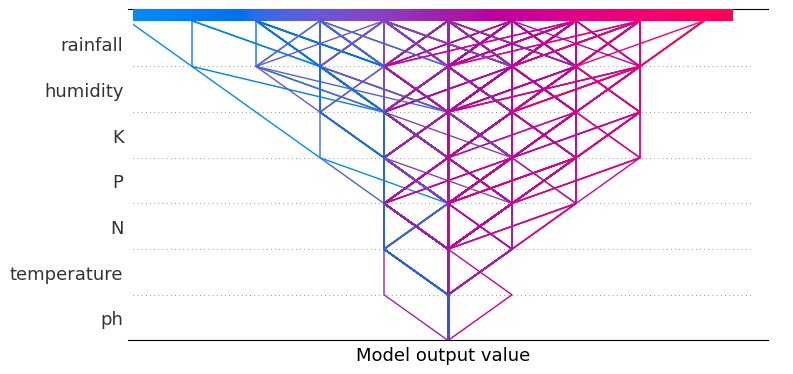

In [4]:
shap.decision_plot(explainer.expected_value[1], shap_values_summary, X_test.columns)

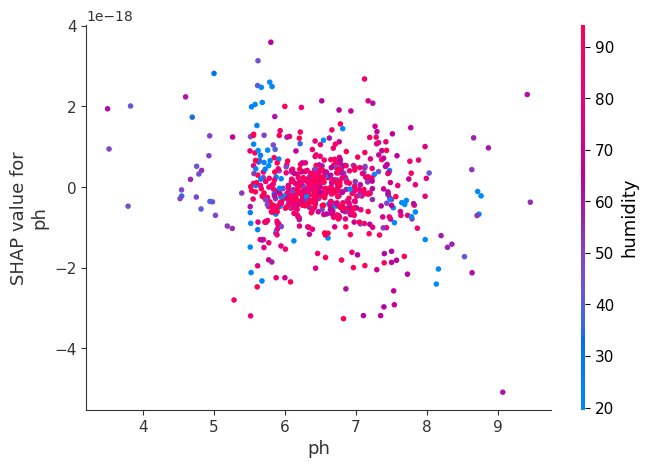

In [5]:
shap.dependence_plot("ph", shap_values_summary, X_test,interaction_index="humidity")

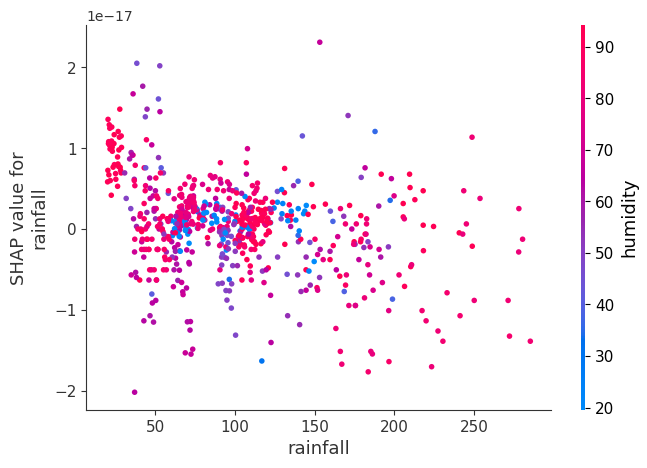

In [6]:
shap.dependence_plot("rainfall", shap_values_summary, X_test,interaction_index="humidity")

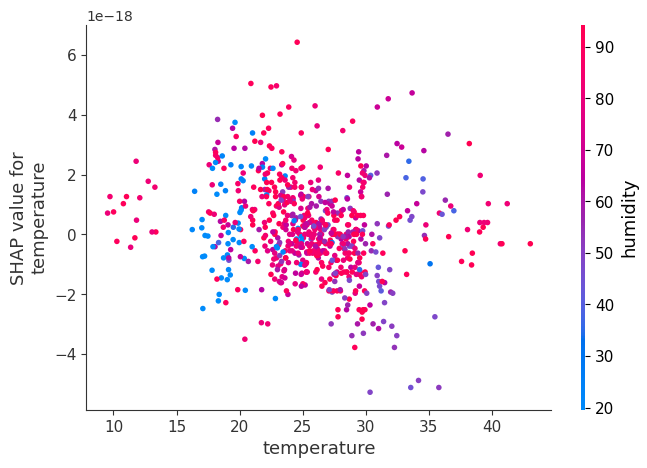

In [7]:
shap.dependence_plot("temperature", shap_values_summary, X_test,interaction_index="humidity")

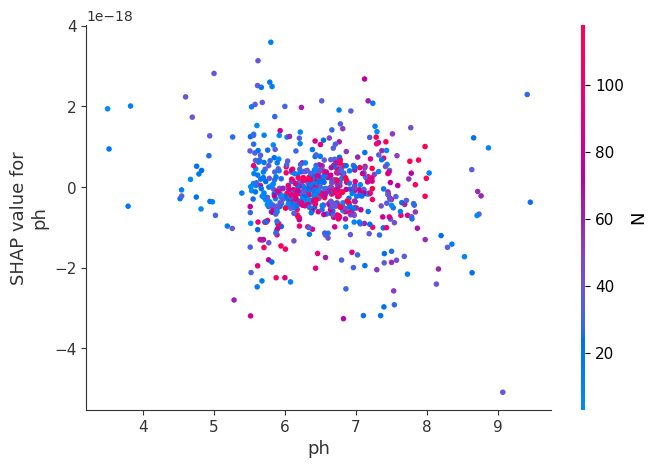

In [8]:
shap.dependence_plot("ph", shap_values_summary, X_test,interaction_index="N")